In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
print("Packages installed successfully!")

#source env/bin/activate

Packages installed successfully!


In [6]:
#run this if doesn work in terminal
#pip install pandas numpy matplotlib seaborn scikit-learn
#Load the dataset
data = pd.read_csv('data/global_air_pollution_data.csv')


In [7]:
# Display the first few rows
print(data.head())

         country_name         city_name  aqi_value aqi_category  \
0  Russian Federation        Praskoveya         51     Moderate   
1              Brazil  Presidente Dutra         41         Good   
2               Italy   Priolo Gargallo         66     Moderate   
3              Poland         Przasnysz         34         Good   
4              France          Punaauia         22         Good   

   co_aqi_value\t co_aqi_category  ozone_aqi_value ozone_aqi_category  \
0               1            Good               36               Good   
1               1            Good                5               Good   
2               1            Good               39               Good   
3               1            Good               34               Good   
4               0            Good               22               Good   

   no2_aqi_value no2_aqi_category  pm2.5_aqi_value pm2.5_aqi_category  
0              0             Good               51           Moderate  
1             

In [8]:
# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None


In [9]:
# Check for missing values
print(data.isnull().sum())

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64


In [10]:
# Summary statistics
print(data.describe())

          aqi_value  co_aqi_value\t  ozone_aqi_value  no2_aqi_value  \
count  23463.000000    23463.000000     23463.000000   23463.000000   
mean      72.010868        1.368367        35.193709       3.063334   
std       56.055220        1.832064        28.098723       5.254108   
min        6.000000        0.000000         0.000000       0.000000   
25%       39.000000        1.000000        21.000000       0.000000   
50%       55.000000        1.000000        31.000000       1.000000   
75%       79.000000        1.000000        40.000000       4.000000   
max      500.000000      133.000000       235.000000      91.000000   

       pm2.5_aqi_value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


In [11]:
# Summary statistics
print(data.describe())

          aqi_value  co_aqi_value\t  ozone_aqi_value  no2_aqi_value  \
count  23463.000000    23463.000000     23463.000000   23463.000000   
mean      72.010868        1.368367        35.193709       3.063334   
std       56.055220        1.832064        28.098723       5.254108   
min        6.000000        0.000000         0.000000       0.000000   
25%       39.000000        1.000000        21.000000       0.000000   
50%       55.000000        1.000000        31.000000       1.000000   
75%       79.000000        1.000000        40.000000       4.000000   
max      500.000000      133.000000       235.000000      91.000000   

       pm2.5_aqi_value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


In [12]:
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Verify that there are no missing values left in numeric columns
print(data[numeric_cols].isnull().sum())

aqi_value          0
co_aqi_value\t     0
ozone_aqi_value    0
no2_aqi_value      0
pm2.5_aqi_value    0
dtype: int64


In [20]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [13]:
# Print column names to verify the existence of 'date'
print(data.columns)

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')


In [14]:
# Convert data types if necessary (update based on your dataset)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
elif 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
else:
    print("Date column not found in the dataset")

# Display the first few rows to verify changes
print(data.head())

Date column not found in the dataset
         country_name         city_name  aqi_value aqi_category  \
0  Russian Federation        Praskoveya         51     Moderate   
1              Brazil  Presidente Dutra         41         Good   
2               Italy   Priolo Gargallo         66     Moderate   
3              Poland         Przasnysz         34         Good   
4              France          Punaauia         22         Good   

   co_aqi_value\t co_aqi_category  ozone_aqi_value ozone_aqi_category  \
0               1            Good               36               Good   
1               1            Good                5               Good   
2               1            Good               39               Good   
3               1            Good               34               Good   
4               0            Good               22               Good   

   no2_aqi_value no2_aqi_category  pm2.5_aqi_value pm2.5_aqi_category  
0              0             Good               5

/Users/puspakirana/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/puspakirana/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


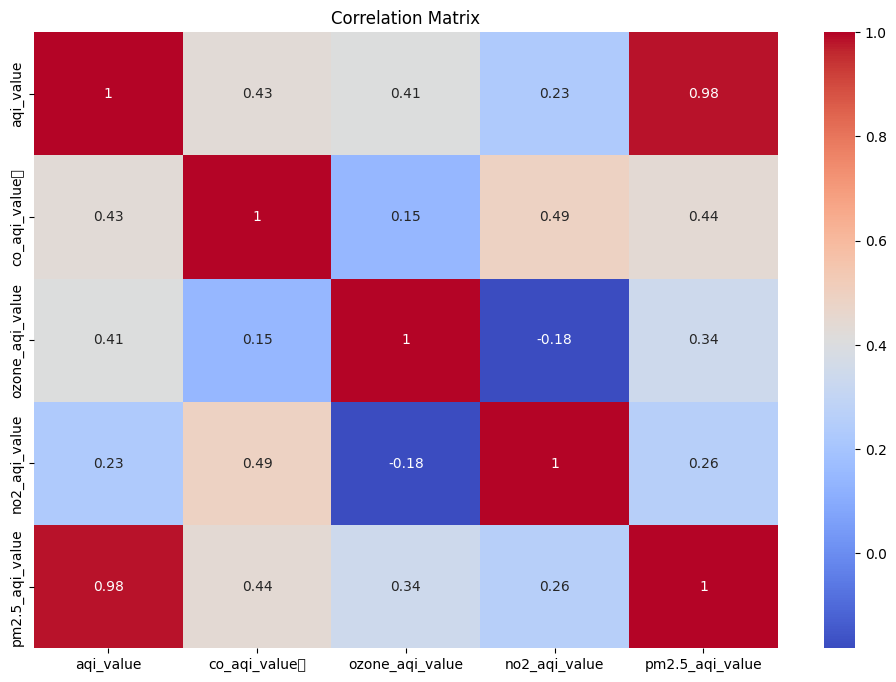

In [15]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include='number')

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Explanation of the Correlation Matrix

A correlation matrix is a table showing correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1.

1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.

### Result heatmap:

Diagonal Values: These are all 1.0 because a variable is always perfectly correlated with itself.
Off-Diagonal Values: These show the pairwise correlations between different variables.

### Interpretation of the Heatmap

1.	Strong Positive Correlations (close to 1):
	aqi_value and pm2.5_aqi_value (0.98): This strong positive correlation indicates that as pm2.5_aqi_value increases, the aqi_value also increases significantly. PM2.5 (particulate matter with diameter less than 2.5 micrometers) is a major component of air pollution and heavily influences the Air Quality Index (AQI).co_aqi_value and no2_aqi_value (0.49): Carbon monoxide and nitrogen dioxide show a moderate positive correlation, suggesting they often increase or decrease together.

2.	Moderate Positive Correlations (0.3 to 0.5):
	co_aqi_value and pm2.5_aqi_value (0.44): This suggests that there is a moderate relationship between carbon monoxide and PM2.5 levels.
	ozone_aqi_value and co_aqi_value (0.15): Although lower, there is still a noticeable correlation indicating these pollutants can sometimes increase or decrease together.

3.	Weak or Negative Correlations (close to 0 or negative)
	no2_aqi_value and ozone_aqi_value (-0.18): A negative correlation here suggests that these two pollutants might often be inversely related; when one is high, the other might be low.

### Insights

1. Impact on AQI: The pm2.5_aqi_value has the highest impact on the overall aqi_value, indicating it is the primary pollutant driving the AQI values in your dataset.
2. Pairwise Relations: The positive correlation between co_aqi_value and no2_aqi_value suggests that these pollutants often come from similar sources or conditions, such as traffic emissions.
3. Inverse Relationships: The negative correlation between ozone_aqi_value and no2_aqi_value can be indicative of complex chemical interactions in the atmosphere where the presence of one can reduce the other.


## PM2.5 Analysis

In [18]:
import pandas as pd
import streamlit as st

# Load the dataset
data = pd.read_csv('data/global_air_pollution_data.csv')


###  Analyzing the seasonal trends and daily patterns of PM2.5 concentrations.

#### Time Series Decomposition

break down the time series data into its seasonal, trend, and residual components.

#### Display the first few rows of the dataset

In [19]:
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


#### Display the column names to inspect what is available

In [20]:
print("Column names in the dataset:")
print(data.columns)


Column names in the dataset:
Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')


#### Handle missing values

In [21]:
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

#### Select a country for filtering (for example, 'Indonesia')

In [22]:
selected_country = 'Indonesia'
filtered_data = data[data['country_name'] == selected_country]
# Display the first few rows of filtered data
print(f"Air Quality Data for {selected_country}:")
display(filtered_data.head())

Air Quality Data for Indonesia:


,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
31,Indonesia,Pontianak,44,Good,1,Good,15,Good,0,Good,44,Good
96,Indonesia,Tidore,21,Good,0,Good,13,Good,0,Good,21,Good
193,Indonesia,Sungaipenuh,17,Good,1,Good,13,Good,0,Good,17,Good
215,Indonesia,Tarogong,88,Moderate,2,Good,53,Moderate,1,Good,88,Moderate
353,Indonesia,Binjai,92,Moderate,2,Good,45,Good,0,Good,92,Moderate


#### Check for missing values in 'pm2.5_aqi_value'

In [23]:
if filtered_data['pm2.5_aqi_value'].isnull().sum() > 0:
    print("Warning: Missing values found in 'pm2.5_aqi_value'. These will be dropped for the histogram plot.")
    filtered_data = filtered_data.dropna(subset=['pm2.5_aqi_value'])


### Distribution of PM2.5 AQI Value

Distribution of PM2.5 AQI Value


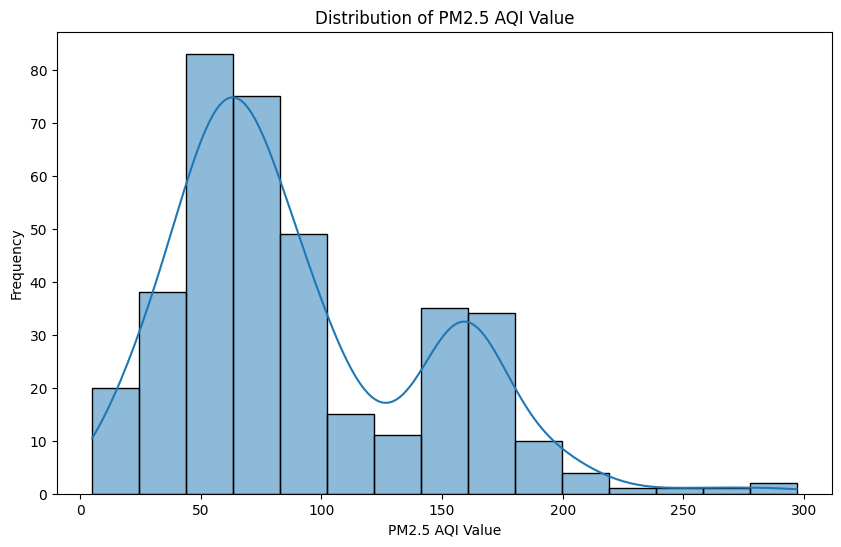

In [24]:
print("Distribution of PM2.5 AQI Value")
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['pm2.5_aqi_value'], kde=True)
plt.title('Distribution of PM2.5 AQI Value')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Frequency')
plt.show()

### PM2.5 vs AQI

PM2.5 vs AQI


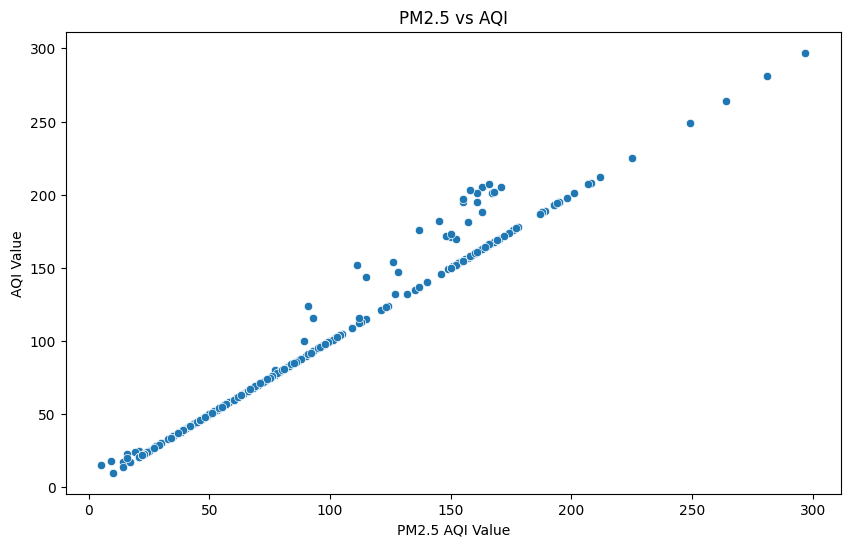

In [25]:
print("PM2.5 vs AQI")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['pm2.5_aqi_value'], y=filtered_data['aqi_value'])
plt.title('PM2.5 vs AQI')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.show()

### Correlation between PM2.5 and AQI

In [26]:
correlation = filtered_data['pm2.5_aqi_value'].corr(filtered_data['aqi_value'])
print(f"Correlation between PM2.5 and AQI: {correlation}")


Correlation between PM2.5 and AQI: 0.9896381736631146


 a correlation coefficient of 0.9896381736631146 between PM2.5 and AQI strongly suggests that these two variables move together almost in tandem. This highlights the need for continued efforts to monitor and control air pollution, especially PM2.5, to maintain or improve air quality.

### Define features and target for modeling

In [27]:
features = ['co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value']
features_present = [feature for feature in features if feature in filtered_data.columns]

if features_present:
    X = filtered_data[features_present]
    y = filtered_data['pm2.5_aqi_value']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
else:
    print("Required feature columns are not present in the dataset.")

Mean Squared Error: 267.57818660415654
R^2 Score: 0.9259522106238458


The relatively low MSE combined with a high  R^2  score generally indicates a model that has a good fit to the data. While the MSE provides a raw measure of error magnitude in the same units as the target variable, the  R^2  score gives a scaled indication of how much of the total variation in the dependent variable your model is capturing.

Goodness of Fit: In practical terms, these metrics suggest that the model is performing well in terms of both absolute errors (MSE) and in proportion of variance explained ( R^2 ), which is often desirable in a predictive model.


### Explanation

1.	Data Loading and Initial Inspection:
	Loading the dataset and display the first few rows to ensure it is correctly loaded.
	Displaying the column names to inspect what is available.

2.	Handling Missing Values:
	•	Filling missing values in numeric columns with their mean values.

3.	Data Filtering:
	•	Filtering data based on the selected country 

4.	Visualizations:
	•	Ploting the distribution of pm2.5_aqi_value.
	•	Creating a scatter plot to show the relationship between pm2.5_aqi_value and aqi_value.

5.	Correlation Calculation:
	•	Calculate and display the correlation between pm2.5_aqi_value and aqi_value.
	
6.	Modeling:
	•	Define features and target for the Random Forest Regressor model.
	•	Split the data into training and testing sets.
	•	Train the model, make predictions, and evaluate performance using Mean Squared Error (MSE) and R-squared (R²) score.